In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import itertools
plt.style.use('fivethirtyeight')


# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

diab = pd.read_csv('diabetes.csv')

diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

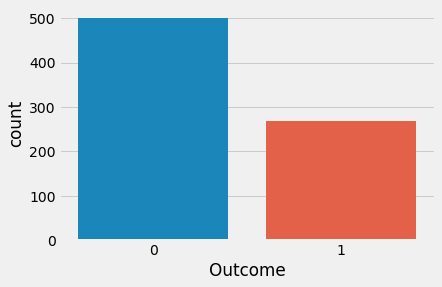

In [20]:
sns.countplot(x='Outcome',data=diab)
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier 

model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']

model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64

In [14]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

diab2=diab[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
features=diab2[diab2.columns[:4]]

#features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
#x=pd.DataFrame(features_standard,columns=[['Glucose','BMI','Age','DiabetesPedigreeFunction']])
train1,test1=train_test_split(diab2,test_size=0.25,random_state=0)

train_X1=train1[train1.columns[:4]]
test_X1=test1[test1.columns[:4]]
train_Y1=train1['Outcome']
test_Y1=test1['Outcome']

print(train_Y1.head(5))
train_X1.head(5)

762    0
127    0
564    0
375    1
663    1
Name: Outcome, dtype: int64


,Glucose,BMI,Age,DiabetesPedigreeFunction
762,89,22.5,33,0.142
127,118,33.3,23,0.261
564,91,32.4,27,0.601
375,140,39.2,58,0.528
663,145,37.9,40,0.637


In [15]:
model = LogisticRegression()
model.fit(train_X1,train_Y1)
prediction=model.predict(test_X1)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y1))

The accuracy of the Logistic Regression is 0.78125


In [17]:
model.predict(np.array([[95, 24, 45, 0.25]]))

array([0], dtype=int64)

In [24]:
model.predict(np.array([[116, 24, 190, 0.25]]))

array([1], dtype=int64)

In [25]:
train_Y1.head()

762    0
127    0
564    0
375    1
663    1
Name: Outcome, dtype: int64